In [8]:
import evaluate
import numpy as np
from RFDN import RFDN
from FDCN import FDCN

In [2]:
# model = RFDN(nf=10, upscale=2)
model = FDCN(nf=10, upscale=2)
checkpoint_file = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/checkpoint_40.tar"
data_dir = "/home/samuel/Documents/CMPUT511/Project/Data"

e = evaluate.Evaluate(model, checkpoint_file, data_dir)

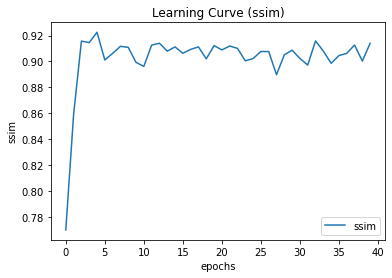

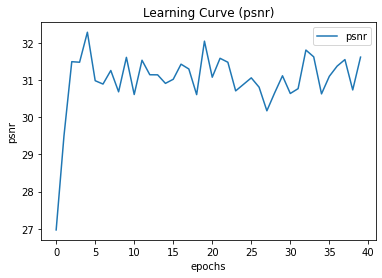

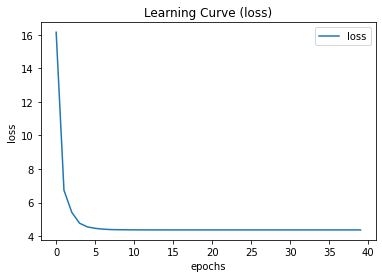

In [3]:
e.plot_lc("ssim")
e.plot_lc("psnr")
e.plot_lc("loss")

In [4]:
e.predict("/home/samuel/Documents/CMPUT511/Project/Data/val/LR/DIV2K_valid_LR_bicubic/X2/0900x2.png", img_name="/home/samuel/Documents/CMPUT511/Project/Checkpoints/checkpoint.jpg")

PSNR: 29.947253162943248
SSIM: 0.9059860110282898
Average Loss: 4.766430185372011
Saving image


In [5]:
values = e.get_values()
psnr = np.mean(values["psnr"])
ssim = np.mean(values["ssim"])
time = np.mean(values["time"])

100%|██████████| 100/100 [02:01<00:00,  1.22s/it]


{'psnr': [34.055184936004615,
  37.875046388743215,
  39.170598888712924,
  30.179858541655108,
  32.517812710925995,
  30.855531011247763,
  22.415761819648104,
  29.25254704905155,
  37.4749784502158,
  31.12788629505506,
  33.368531135491175,
  31.04375957175297,
  33.8317487673866,
  31.689637370100307,
  36.542011129282756,
  34.42200164504447,
  34.02262062156115,
  31.713966754681138,
  31.76651753257243,
  27.731012630323413,
  32.45435733475799,
  34.22056851048506,
  28.472025548568265,
  29.74548933998047,
  30.060976190150082,
  26.522650798442697,
  35.769712961722234,
  21.295598905047058,
  28.280612049779,
  27.169366785989922,
  33.137207740675684,
  34.83750425856267,
  34.872575001613846,
  28.493833779808966,
  25.932010861862558,
  27.92429577580755,
  28.8745607158034,
  39.72329146270479,
  32.23540345510439,
  32.3502807563994,
  31.792352578542978,
  32.95634118301863,
  41.44586450191436,
  36.90734197311929,
  25.746210011138416,
  27.075923475796017,
  30.25

In [ ]:
print(f"Average PSNR:           {psnr}")
print(f"Average SSIM:           {ssim}")
print(f"Average Inference Time: {time}")